## Outlier Handling
### @cipher499
### 18/12/23

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# to display all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [11]:
# set a default figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [12]:
# load the dataset into a dataframe
df = pd.read_csv('gurgaon_properties_fe.csv').drop_duplicates()
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,19.0,NaN,Undefined,1828.0,NaN,NaN,0,0,0,0,0,0,48
1,flat,bestech park view city,sector 48,2.65,10323.0,2567.0,Super Built up area 2567(238.48 sq.m.)Carpet a...,4,4,3+,11.0,North-East,Moderately Old,2567.0,NaN,1750.0,1,1,0,0,0,1,174
2,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2,2,3,6.0,North,Relatively New,1640.0,1300.0,1000.0,0,0,0,0,0,1,174
3,flat,signature global solera,sector 107,0.52,8062.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,5.0,East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15
4,flat,signature global park,sohna road,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2,1,3,1.0,NaN,New Property,NaN,NaN,745.0,0,0,0,0,0,0,65


### Outlier Detection:
- Normal Distribution - > | mean +- 3 S.D |
- Non-normal Distribution -> boxplot method: upper and lower bounds

#### **Price**

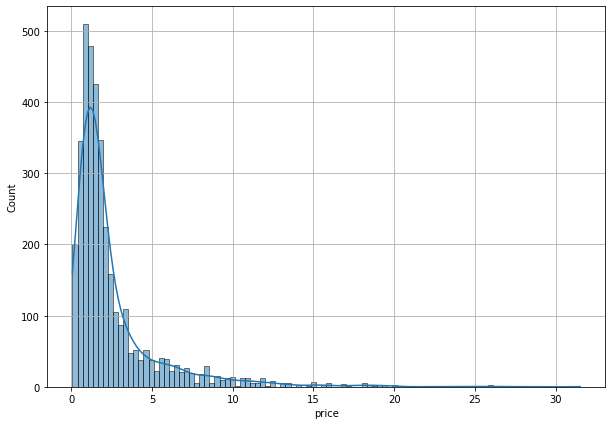

In [13]:
sns.histplot(df['price'], bins=100, kde=True)
plt.grid()

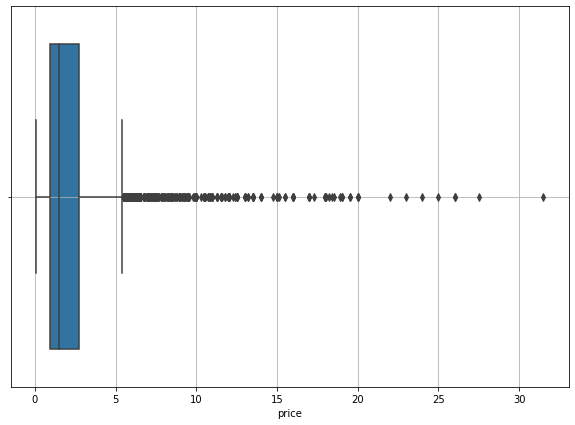

In [14]:
sns.boxplot(x=df['price'])
plt.grid()

In [15]:
Q1 = df['price'].quantile(0.25)        # first quantile
Q3 = df['price'].quantile(0.75)        # third quantile
IQR = Q3 - Q1                          # Interquartile range

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# filter out the points that fall outside of the upper and lower bounds
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
 
num_outliers = outliers.shape[0]       # number of outliers
outliers_stats = outliers['price'].describe()     # descriptive statistics of outliers

num_outliers, outliers_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [16]:
# sort the outliers in descending order of price
outliers.sort_values('price', ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1178,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,2,74
1774,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1,1,0,1,1,1,42
3273,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,1,138
1487,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
572,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
229,house,emaar the palm springs,sector 54,24.0,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
3344,house,independent,sector 26,23.0,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,1000.0,NaN,1,1,1,1,0,1,145
3037,house,vipul tatvam villa,sector 48,22.0,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
625,house,dlf city plots,sector 26,20.0,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,502.0,NaN,1,1,1,1,0,1,153
2270,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,500.0,NaN,0,1,0,1,0,2,97


- In the price column, we can say that there are some genuine outliers but there are some data errors as well.

#### **Price per sqft**

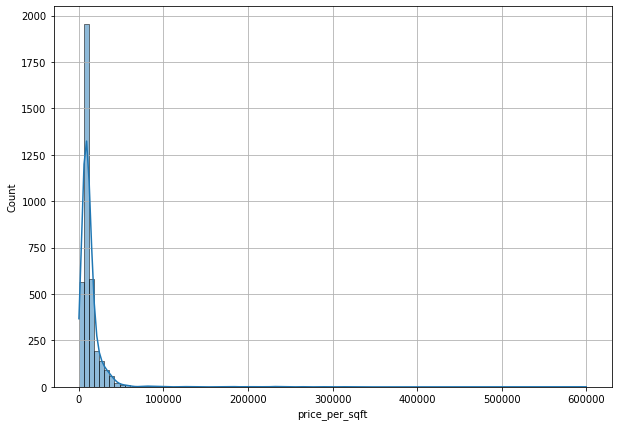

In [17]:
sns.histplot(df['price_per_sqft'], bins=100, kde=True)
plt.grid()

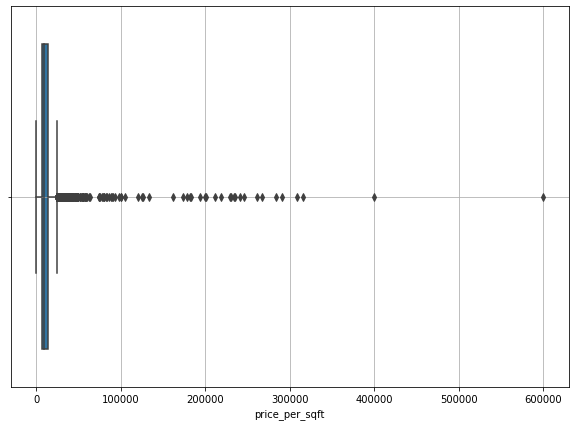

In [18]:
sns.boxplot(x=df['price_per_sqft'])
plt.grid()

In [19]:
Q1 = df['price_per_sqft'].quantile(0.25)        # first quantile
Q3 = df['price_per_sqft'].quantile(0.75)        # third quantile
IQR = Q3 - Q1                                   # Interquartile range

lower_bound = Q1 - 1.5*IQR                      
upper_bound = Q3 + 1.5*IQR

# filter out the points that fall outside of the upper and lower bounds
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

num_outliers_sqft = outliers_sqft.shape[0]      # number of outliers in this column
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()   # descriptive stats of the outliers

num_outliers_sqft, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [20]:
# sort the outliers in descending order of price per sqft
outliers_sqft.sort_values('price_per_sqft', ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
229,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1635,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,1,114
3617,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
3213,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
2391,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,1,49
1310,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,NaN,240.0,NaN,0,1,0,0,0,0,49
2356,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,NaN,300.0,NaN,1,1,0,1,0,0,21
2437,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,NaN,402.0,NaN,0,1,0,1,0,1,91
1567,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,2,7
2141,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,1,0,0,0,70


- It seems that for some values in price per sqft, the area is in sq-yds instead of sq-m which can probably account for the high price per sqft values. To correct these data errors, we'll scale the column with the right units.

In [21]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x < 1000 else x)

/tmp/ipykernel_4882/2116044681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x < 1000 else x)


In [22]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/tmp/ipykernel_4882/3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [23]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [24]:
# update the original dataframe
df.update(outliers_sqft)

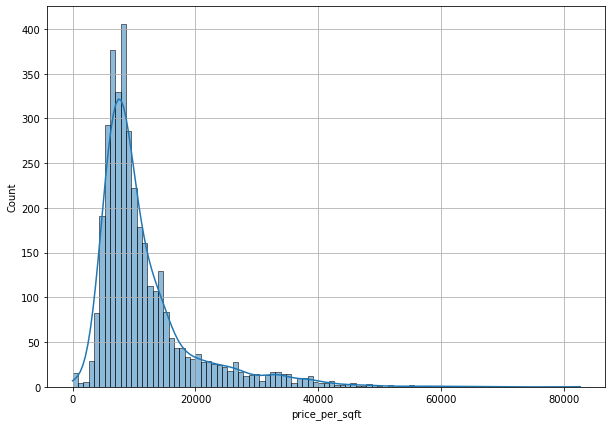

In [25]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.grid()

- The distribution looks much closer to the normal distribution now

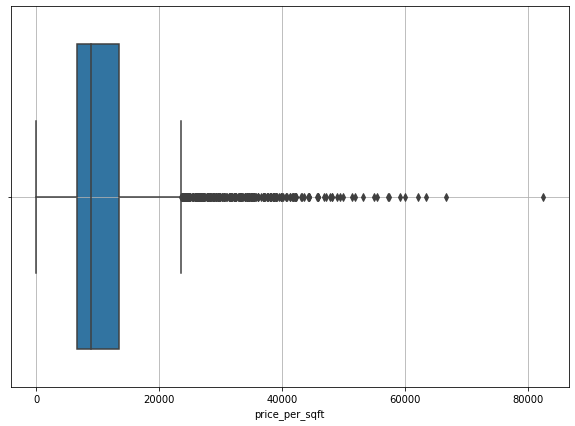

In [26]:
sns.boxplot(x=df['price_per_sqft'])
plt.grid()

In [27]:
# data points above 50000
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
229,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,122.0
716,house,cloudnine cottages,sohna road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,360.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,75.0
914,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1487,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1953,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,270.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,137.0
2024,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
3081,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3273,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,505.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,138.0
3416,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,316.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0


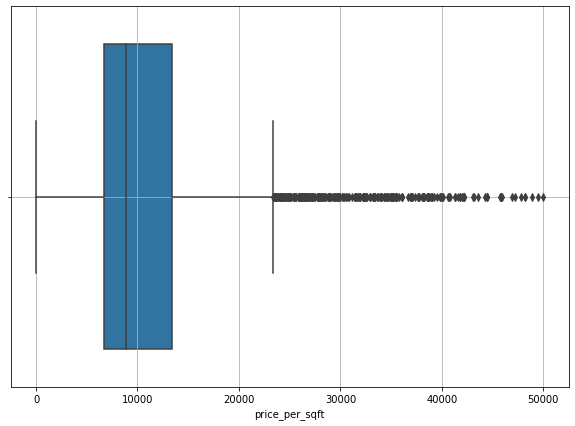

In [28]:
# dropping the points equal or greater than 50000
df = df[df['price_per_sqft'] <= 50000]
sns.boxplot(x=df['price_per_sqft'])
plt.grid()

#### **Area**

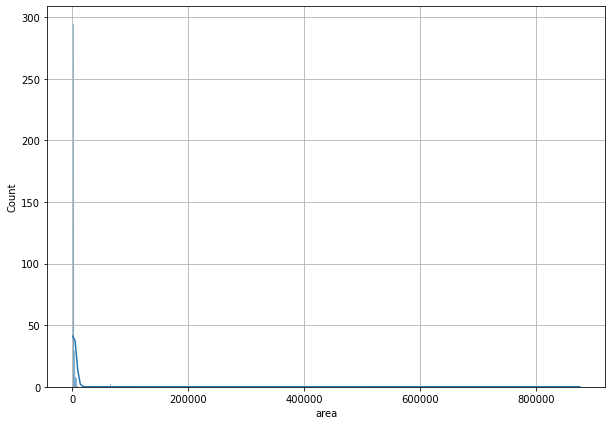

In [29]:
sns.histplot(df['area'], kde=True)
plt.grid()

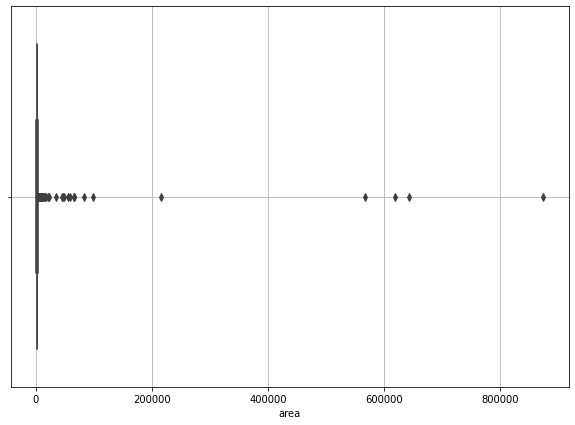

In [39]:
sns.boxplot(x=df['area'])
plt.grid()

In [30]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [31]:
# data points beyond area = 100000
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
196,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1769,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0
1857,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0
2562,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0
3476,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0


- The prices do not reflect the large areas of these properties

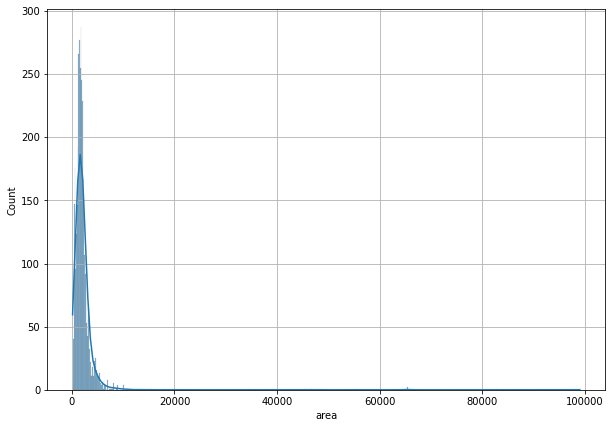

In [32]:
# dropping all the rows beyond area = 100000
df = df[df['area'] < 100000]
sns.histplot(df['area'], kde=100)
plt.grid()

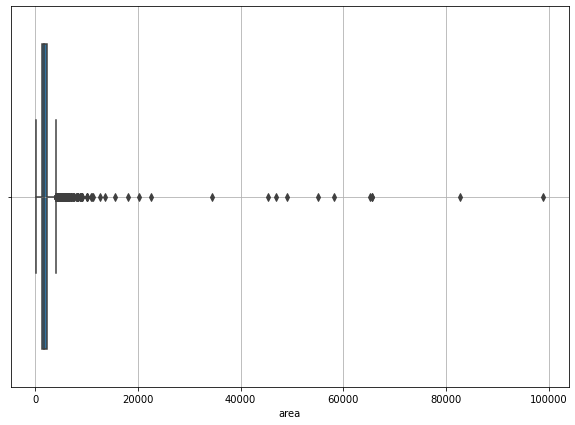

In [33]:
sns.boxplot(x=df['area'])
plt.grid()

In [34]:
# filtering out the point beyond area = 10000 in descending order of area
df[df['area'] > 10000].sort_values('area', ascending=False)
# 3455, 1080, 1407, 2434, 2435, 336, 2741, 1757, 494

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3455,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,1.0,60.0
1458,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
1080,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
1407,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
689,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2434,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2435,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0
336,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0
2891,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
2741,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [35]:
# dropping all the points for which the prices are inconsistent with area values
df.drop(index=[3455, 1080, 1407, 2434, 2435, 336, 2741, 1757, 494], inplace=True)
df[df['area'] > 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1458,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
689,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
2968,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,1.0,61.0
2419,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,1.0,123.0
3027,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,1.0,44.0
1788,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,0.0,160.0
1399,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,0.0,55.0
1774,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0
2558,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [36]:
# correcting the area values from other area columns
df.loc[1458, 'area'] = 115*9
df.loc[689, 'area'] = 7250
df.loc[2891, 'area'] = 5800
df.loc[2968, 'area'] = 2660
df.loc[2419, 'area'] = 2850
df.loc[3027, 'area'] = 1812
df.loc[1788, 'area'] = 2160
df.loc[1399, 'area'] = 1175

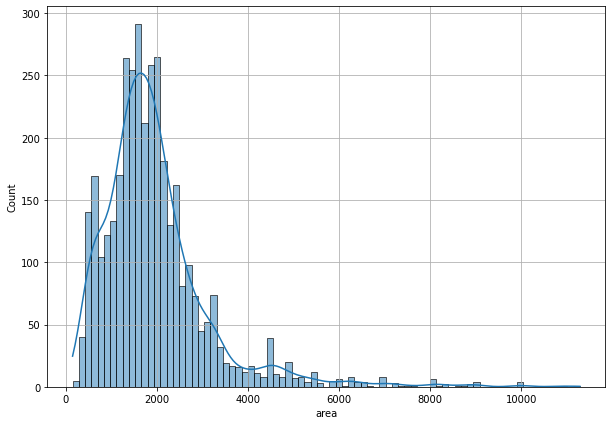

In [37]:
sns.histplot(df['area'], kde=True)
plt.grid()

- The distribution now looks much closer to a normal distribution

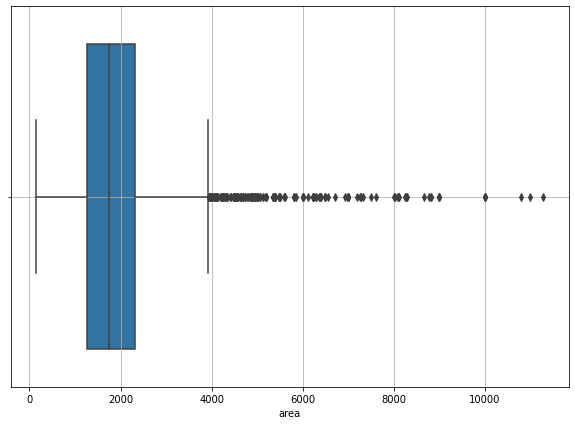

In [38]:
sns.boxplot(x=df['area'])
plt.grid()

In [39]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

#### **Bedrooms**

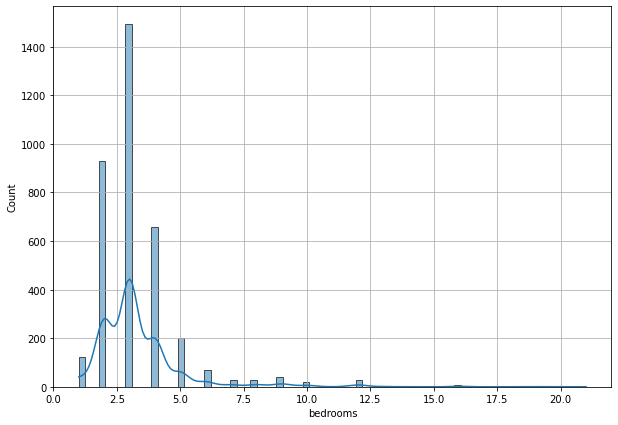

In [40]:
sns.histplot(df['bedrooms'], kde=True)
plt.grid()

In [41]:
df['bedrooms'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedrooms, dtype: float64

In [42]:
# filter out the rows with more than 10 bedrooms
df[df['bedrooms'] > 10].sort_values('bedrooms', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1368,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,129.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
3496,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,128.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
2814,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0
2183,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0
1656,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,160.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
3330,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,167.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
208,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,342.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3420,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,300.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,49.0
625,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,502.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
3284,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,300.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,41.0


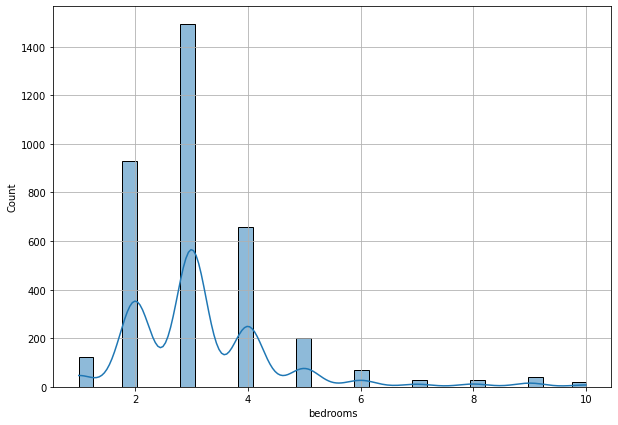

In [43]:
# drop the rows with more than 10 bedrooms as they are inconsistent with the price of the property
df = df[df['bedrooms'] <= 10]
sns.histplot(df['bedrooms'], kde=True)
plt.grid()

In [44]:
df['bedrooms'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64

#### **Bathrooms**

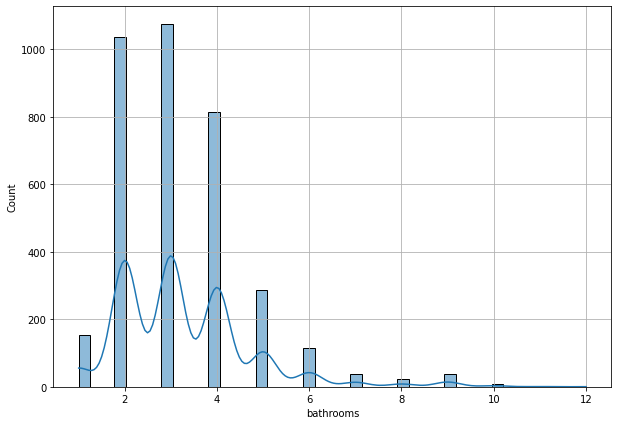

In [45]:
sns.histplot(df['bathrooms'], kde=True)
plt.grid()

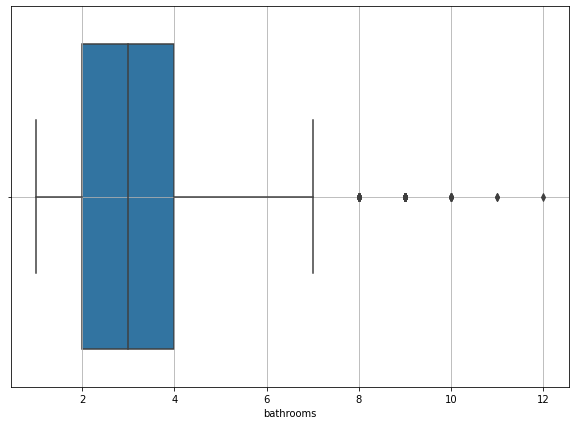

In [46]:
sns.boxplot(x=df['bathrooms'])
plt.grid()

In [47]:
# fitler out the rows with more than 10 bathrooms
df[df['bathrooms'] > 10].sort_values('bathrooms', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1531,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,146.0
12,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,39.0
3405,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0


#### **Super built up area**

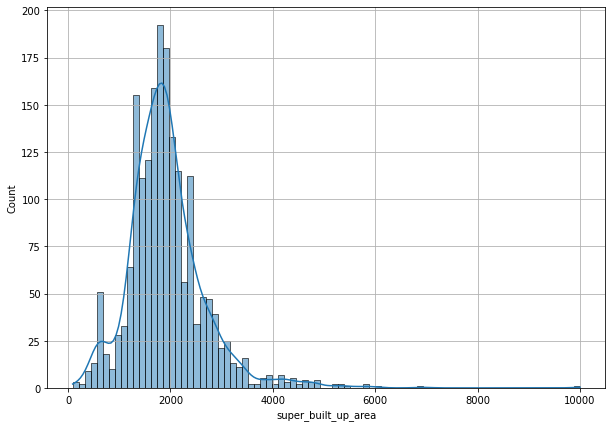

In [49]:
sns.histplot(df['super_built_up_area'], kde=True)
plt.grid()

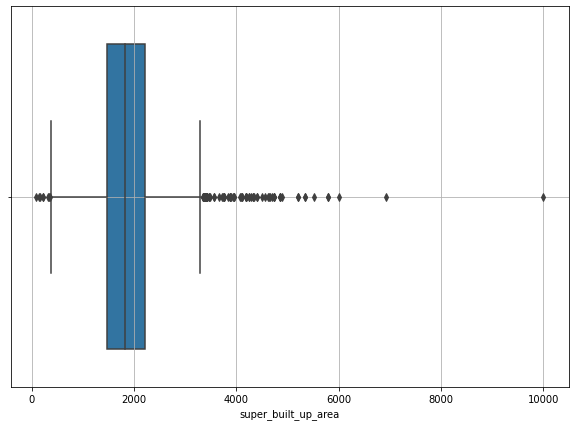

In [50]:
sns.boxplot(x=df['super_built_up_area'])
plt.grid()

In [51]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [52]:
# filter out the rows with sbu area greater 5000
df[df['super_built_up_area'] > 5000].sort_values('super_built_up_area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1561,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0
520,flat,bestech park view grand spa,sector 81,4.70,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,140.0
844,flat,.,gwal pahari,7.00,11000.0,6364.0,Super Built up area 6000(557.42 sq.m.),4.0,4.0,3+,6.0,South-West,Relatively New,6000.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,52.0
1548,flat,krrish provence estate,gwal pahari,5.25,9051.0,5800.0,Super Built up area 5800(538.84 sq.m.),4.0,5.0,3+,2.0,North-East,New Property,5800.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,49.0
3277,flat,krrish provence estate,gwal pahari,5.50,9482.0,5800.0,Super Built up area 5800(538.84 sq.m.),4.0,5.0,3+,11.0,East,New Property,5800.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,151.0
3072,flat,pioneer araya,sector 62,10.75,19500.0,5513.0,Super Built up area 5514(512.27 sq.m.),5.0,7.0,3,10.0,North-East,Relatively New,5514.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,153.0
1547,flat,paras quartier,gwal pahari,7.50,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4.0,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0
1900,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4.0,3+,19.0,East,New Property,5350.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,160.0
1834,flat,raheja vedas,sector 108,2.15,4134.0,5201.0,Super Built up area 5200(483.1 sq.m.)Built Up ...,3.0,4.0,3+,12.0,East,Relatively New,5200.0,4600.0,4000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2379,flat,beverley park 1,sector 43,8.44,16230.0,5200.0,Super Built up area 5200(483.1 sq.m.)Built Up ...,4.0,5.0,3,9.0,North-East,Moderately Old,5200.0,5000.0,4900.0,0.0,1.0,0.0,0.0,0.0,2.0,117.0


#### **Built up area**

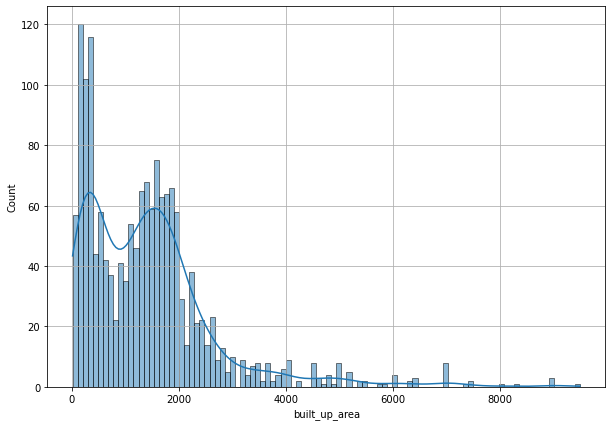

In [53]:
sns.histplot(df['built_up_area'], bins=100, kde=True)
plt.grid()

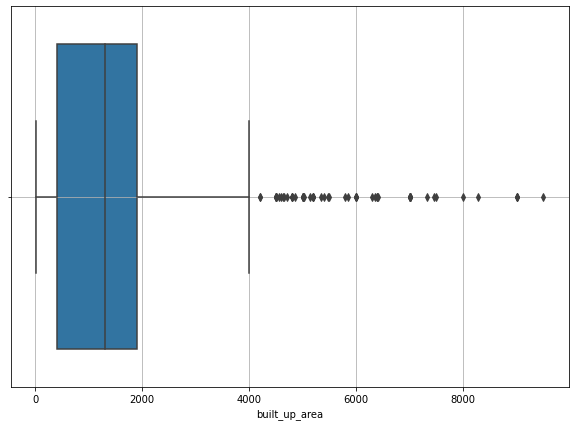

In [54]:
sns.boxplot(x=df['built_up_area'])
plt.grid()

In [55]:
df['built_up_area'].describe()

count    1613.000000
mean     1425.456311
std      1279.402065
min        14.000000
25%       400.000000
50%      1300.000000
75%      1900.000000
max      9500.000000
Name: built_up_area, dtype: float64

In [56]:
# filter out the rows with built up area greater than 7000
df[df['built_up_area'] > 7000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
162,house,sobha city,sector 108,10.50,14323.0,7331.0,Built Up area: 7331 (681.07 sq.m.),5.0,4.0,3+,1.0,East,Undefined,NaN,7331.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,59.0
644,house,independent,sector 56,8.00,9654.0,8287.0,Plot area 362(33.63 sq.m.)Built Up area: 8286 ...,10.0,10.0,3+,4.0,NaN,Relatively New,NaN,8286.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,107.0
645,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 950...,5.0,5.0,3+,3.0,East,Moderately Old,NaN,9500.0,9000.0,0.0,1.0,0.0,1.0,0.0,2.0,29.0
964,house,anamika enclave,sector 12,6.00,14492.0,4140.0,Plot area 4140(384.62 sq.m.)Built Up area: 900...,9.0,9.0,3+,3.0,North-West,Old Property,NaN,9000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1702,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000...,7.0,8.0,3+,3.0,NaN,Old Property,NaN,9000.0,6500.0,0.0,1.0,1.0,1.0,0.0,1.0,31.0
2101,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,112.0
2620,house,unitech palms south city 1,sector 41,9.35,28858.0,3240.0,Plot area 3240(301.01 sq.m.)Built Up area: 750...,10.0,10.0,3+,4.0,North-East,Moderately Old,NaN,7500.0,6000.0,1.0,1.0,0.0,0.0,0.0,1.0,70.0
3550,house,dlf alameda,sector 73,17.00,35109.0,4842.0,Plot area 4842(449.84 sq.m.)Built Up area: 900...,5.0,8.0,3,3.0,North-West,Relatively New,NaN,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,87.0
3563,house,experion windchants,sector 112,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5.0,5.0,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,45.0


#### **Carpet area**

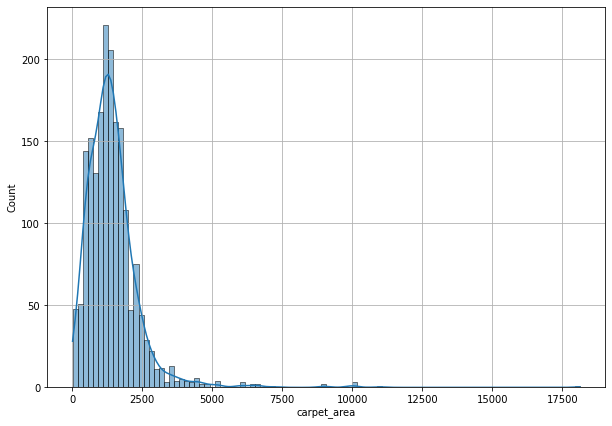

In [57]:
sns.histplot(df['carpet_area'], bins=100, kde=True)
plt.grid()

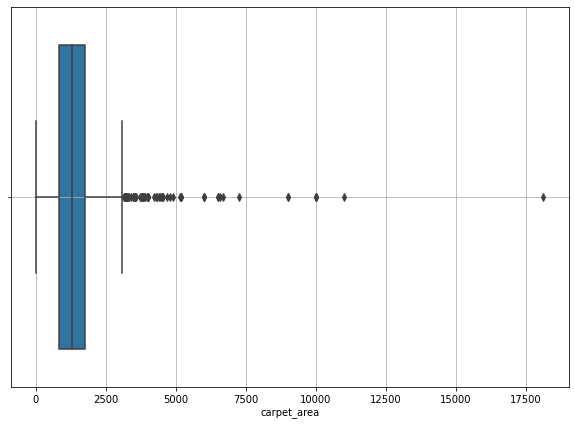

In [70]:
sns.boxplot(x=df['carpet_area'])
plt.grid()

In [71]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2558,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
3027,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0


In [72]:
df.loc[3027, 'carpet_area'] = 1812

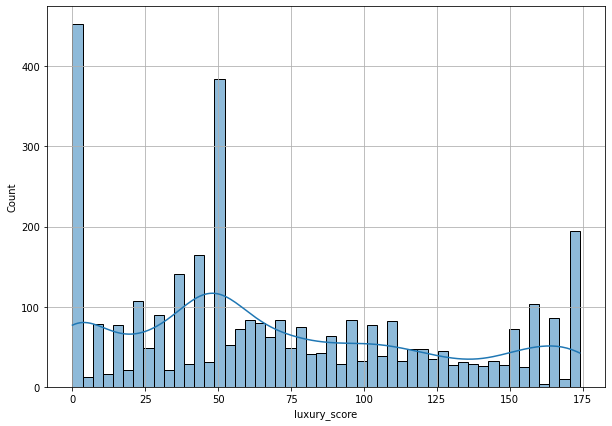

In [75]:
sns.histplot(df['luxury_score'], bins=50, kde=True)
plt.grid()

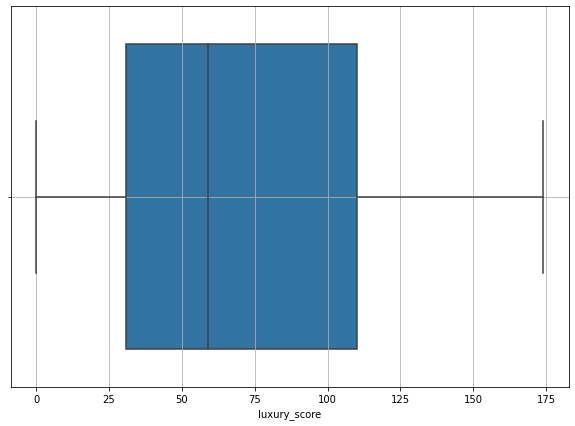

In [76]:
sns.boxplot(x=df['luxury_score'])
plt.grid()

- No outliers

In [77]:
# Since we updated the area columns, now we'll update the price_per_sqft column as well

In [78]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13602.0,1838.0,Super Built up area 1828(169.83 sq.m.),3.0,3.0,3,19.0,NaN,Undefined,1828.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,48.0
1,flat,bestech park view city,sector 48,2.65,10323.0,2567.0,Super Built up area 2567(238.48 sq.m.)Carpet a...,4.0,4.0,3+,11.0,North-East,Moderately Old,2567.0,NaN,1750.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
2,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2.0,2.0,3,6.0,North,Relatively New,1640.0,1300.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0
3,flat,signature global solera,sector 107,0.52,8062.0,645.0,Carpet area: 645 (59.92 sq.m.),3.0,2.0,2,5.0,East,Relatively New,NaN,NaN,645.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0
4,flat,signature global park,sohna road,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2.0,1.0,3,1.0,NaN,New Property,NaN,NaN,745.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


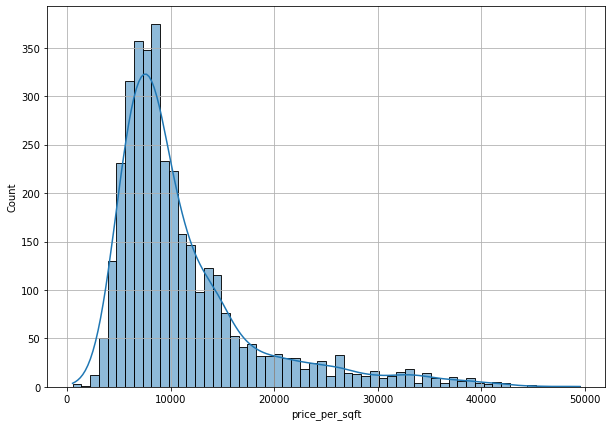

In [79]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.grid()

In [80]:
df[df['price_per_sqft'] > 40000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
66,house,ss hibiscus,sector 50,12.50,40850.0,3060.0,Plot area 470(392.98 sq.m.)Built Up area: 410 ...,4.0,4.0,3+,2.0,West,Relatively New,NaN,410.0,340.0,1.0,1.0,0.0,0.0,0.0,2.0,160.0
207,house,independent,sector 43,9.50,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0
468,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0
740,house,independent,sector 105,9.90,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,house,sushant lok 1 builder floors,sector 43,13.00,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,300.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.0
1086,house,independent,sector 28,11.75,41315.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,316.0,NaN,1.0,1.0,1.0,0.0,0.0,1.0,54.0
1833,flat,dlf the grove,sector 54,5.70,41245.0,1382.0,Built Up area: 1382 (128.39 sq.m.),3.0,3.0,3,1.0,East,Undefined,NaN,1382.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,46.0
1852,house,independent,sector 26,18.90,41833.0,4518.0,Plot area 502(419.74 sq.m.),6.0,8.0,2,3.0,North-East,Relatively New,NaN,502.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,120.0
2063,house,dlf city plots,sector 26,19.00,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,502.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,121.0
2270,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0


In [81]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedrooms']).quantile(0.02)

183.33333333333334